In [8]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
import hepi.prospino2 as ps
import hepi.resummino as rs
import hepi.madgraph as mg
import hepi.util as util
import matplotlib.pyplot as plt
rs.set_path("~/git/resummino_test")
ps.set_path("/home/apn/git/Prospino2")
mg.set_path("/opt/MG5_aMC_v2_7_0")
print (ps.get_path())
model_path="/opt/MG5_aMC_v2_7_0/models/EWKino_NLO_UFO_py3"

0.1.4.18+dirty
/home/apn/git/Prospino2/


In [16]:
params = [
    "mastercode_with_gm2.in",
    #"mastercode_with_gm2_red.in",
    #"ps.in"
]
pss = [ 
    
      (1000022,1000022),
    
     ]

# LO Mass

./output/46193e0b0535bde378e469a8cc9ef28f316c194433e16227e104cd1a8e5f4143.out
No module named madgraph
INFO: ************************************************************
*                                                          *
*           W E L C O M E  to  M A D G R A P H 5           *
*                       a M C @ N L O                      *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 5.2.7.3               20xx-xx-xx         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*                 http://amcatnlo.cer

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


INFO: Using LHAPDF v6.3.0 interface for PDFs 
INFO: Compiling source... 
INFO:           ...done, continuing with P* directories 
 Check the MG5_aMC option 'output_dependencies'.
 This will prevent the use of HERWIG6/Pythia6 shower. 
INFO: Compiling directories... 
INFO: Compiling on 16 cores 
INFO:  Compiling P0_uux_n1n1... 
INFO:  Compiling P0_ccx_n1n1... 
INFO:  Compiling P0_ddx_n1n1... 
INFO:  Compiling P0_ssx_n1n1... 
INFO:  Compiling P0_uxu_n1n1... 
INFO:  Compiling P0_cxc_n1n1... 
INFO:  Compiling P0_dxd_n1n1... 
INFO:  Compiling P0_sxs_n1n1... 
INFO:  Compiling P0_bbx_n1n1... 
INFO:  Compiling P0_bxb_n1n1... 
INFO:     P0_sxs_n1n1 done. 
INFO:     P0_ccx_n1n1 done. 
INFO:     P0_ssx_n1n1 done. 
INFO:     P0_uxu_n1n1 done. 
INFO:     P0_bbx_n1n1 done. 
INFO:     P0_bxb_n1n1 done. 
INFO:     P0_ddx_n1n1 done. 
INFO:     P0_cxc_n1n1 done. 
INFO:     P0_uux_n1n1 done. 
INFO:     P0_dxd_n1n1 done. 
INFO: Checking test output: 
INFO: P0_uux_n1n1 
INFO:  Result for test_ME: 
INFO:    

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Running: 14 jobs
Running: 14 jobs


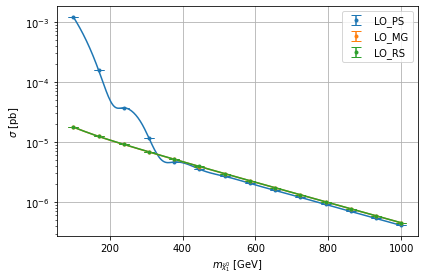

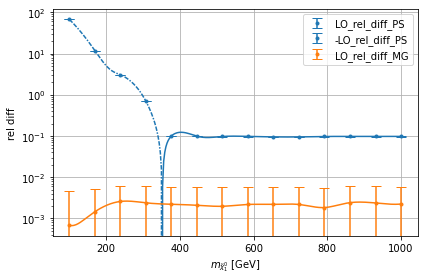

In [24]:
for pa,pb in pss:
    for param in params:
        i = hepi.Input(hepi.Order.LO,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.,model_path=model_path)
        #i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path,id="5")
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(100,1000,14))
        skip = False
        mg_dl = mg.run(li,noskip=not skip)
        ps_dl = ps.run(li,skip=skip)
        rs_dl = rs.run(li,noskip=not skip)
        o="LO"
        rs_dl['LO_rel_diff_mg'] = (rs_dl[o]-mg_dl[o])/rs_dl[o]
        rs_dl['LO_rel_diff_ps'] = (rs_dl[o]-ps_dl[o])/rs_dl[o]
        #print(mg_dl)
        hepi.mass_plot(ps_dl,"LO",pa,label="LO_PS",logy=True)
        hepi.mass_plot(mg_dl,"LO",pa,label="LO_MG",logy=True)
        hepi.mass_plot(rs_dl,"LO",pa,label="LO_RS",logy=True)
        smpl.plot.show()

        hepi.mass_plot(rs_dl,"LO_rel_diff_ps",pa,logy=True,label="LO_rel_diff_PS",yaxis="rel diff")
        hepi.mass_plot(rs_dl,"LO_rel_diff_mg",pa,logy=True,label="LO_rel_diff_MG",yaxis="rel diff")
        smpl.plot.show()

# NLO Mass

skipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/15a4a6b398024321c9ce4ecf4ebc514cb5f8e83436221f970f869b93ab103412.out
Running: 14 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipRunning: 14 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskip

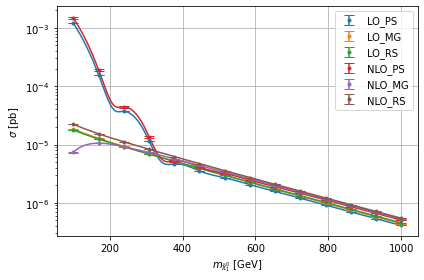

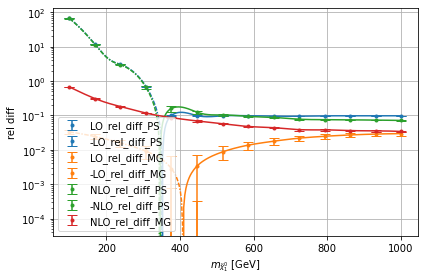

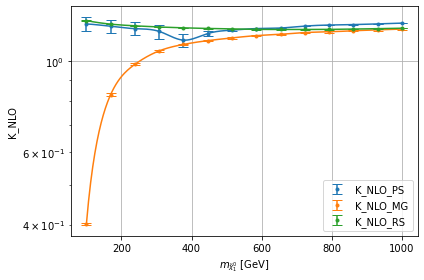

In [18]:
for pa,pb in pss:
    for param in params:
        i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.,model_path=model_path)
        #i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path,id="5")
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(100,1000,14))
        skip = True
        mg_dl = mg.run(li,noskip=not skip)
        ps_dl = ps.run(li,skip=skip)
        rs_dl = rs.run(li,noskip=not skip)
        o="NLO"
        rs_dl['NLO_rel_diff_mg'] = (rs_dl[o]-mg_dl[o])/rs_dl[o]
        rs_dl['NLO_rel_diff_ps'] = (rs_dl[o]-ps_dl[o])/rs_dl[o]
        o="LO"
        rs_dl['LO_rel_diff_mg'] = (rs_dl[o]-mg_dl[o])/rs_dl[o]
        rs_dl['LO_rel_diff_ps'] = (rs_dl[o]-ps_dl[o])/rs_dl[o]
        #print(mg_dl)
        hepi.mass_plot(ps_dl,"LO",pa,label="LO_PS",logy=True)
        hepi.mass_plot(mg_dl,"LO",pa,label="LO_MG",logy=True)
        hepi.mass_plot(rs_dl,"LO",pa,label="LO_RS",logy=True)
        hepi.mass_plot(ps_dl,"NLO",pa,label="NLO_PS",logy=True)
        hepi.mass_plot(mg_dl,"NLO",pa,label="NLO_MG",logy=True)
        hepi.mass_plot(rs_dl,"NLO",pa,label="NLO_RS",logy=True)
        smpl.plot.show()

        hepi.mass_plot(rs_dl,"LO_rel_diff_ps",pa,logy=True,label="LO_rel_diff_PS",yaxis="rel diff")
        hepi.mass_plot(rs_dl,"LO_rel_diff_mg",pa,logy=True,label="LO_rel_diff_MG",yaxis="rel diff")
        hepi.mass_plot(rs_dl,"NLO_rel_diff_ps",pa,logy=True,label="NLO_rel_diff_PS",yaxis="rel diff")
        hepi.mass_plot(rs_dl,"NLO_rel_diff_mg",pa,logy=True,label="NLO_rel_diff_MG",yaxis="rel diff")
        smpl.plot.show()
        hepi.mass_plot(ps_dl,"K_NLO",pa,yaxis="K_NLO",label="K_NLO_PS",logy=True)
        hepi.mass_plot(mg_dl,"K_NLO",pa,yaxis="K_NLO",label="K_NLO_MG",logy=True)
        hepi.mass_plot(rs_dl,"K_NLO",pa,yaxis="K_NLO",label="K_NLO_RS",logy=True)
        smpl.plot.show()


skipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/15a4a6b398024321c9ce4ecf4ebc514cb5f8e83436221f970f869b93ab103412.out
Running: 14 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipRunning: 14 jobs


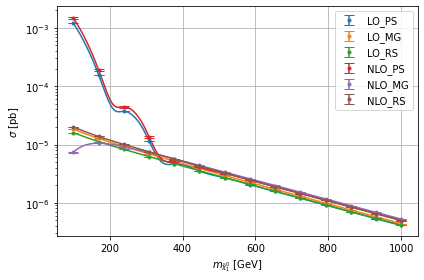

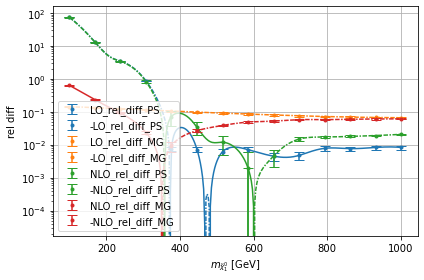

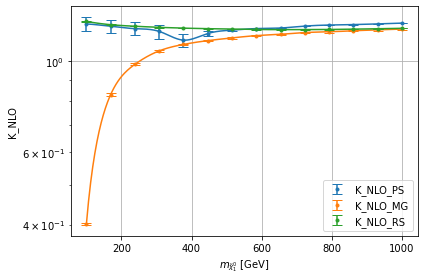

In [23]:
for pa,pb in pss:
    for param in params:
        i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.,model_path=model_path)
        #i = hepi.Input(hepi.Order.NLO,13000,pa,pb,param,"CT14lo","CT14lo",1., 1.,model_path=model_path,id="5")
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(100,1000,14))
        skip = True
        mg_dl = mg.run(li,noskip=not skip)
        ps_dl = ps.run(li,skip=skip)
        rs_dl = rs.run(li,noskip=True)
        
        o="NLO"
        rs_dl['NLO_rel_diff_mg'] = (rs_dl[o]-mg_dl[o])/rs_dl[o]
        rs_dl['NLO_rel_diff_ps'] = (rs_dl[o]-ps_dl[o])/rs_dl[o]
        o="LO"
        rs_dl['LO_rel_diff_mg'] = (rs_dl[o]-mg_dl[o])/rs_dl[o]
        rs_dl['LO_rel_diff_ps'] = (rs_dl[o]-ps_dl[o])/rs_dl[o]
        #print(mg_dl)
        hepi.mass_plot(ps_dl,"LO",pa,label="LO_PS",logy=True)
        hepi.mass_plot(mg_dl,"LO",pa,label="LO_MG",logy=True)
        hepi.mass_plot(rs_dl,"LO",pa,label="LO_RS",logy=True)
        hepi.mass_plot(ps_dl,"NLO",pa,label="NLO_PS",logy=True)
        hepi.mass_plot(mg_dl,"NLO",pa,label="NLO_MG",logy=True)
        hepi.mass_plot(rs_dl,"NLO",pa,label="NLO_RS",logy=True)
        smpl.plot.show()

        hepi.mass_plot(rs_dl,"LO_rel_diff_ps",pa,logy=True,label="LO_rel_diff_PS",yaxis="rel diff")
        hepi.mass_plot(rs_dl,"LO_rel_diff_mg",pa,logy=True,label="LO_rel_diff_MG",yaxis="rel diff")
        hepi.mass_plot(rs_dl,"NLO_rel_diff_ps",pa,logy=True,label="NLO_rel_diff_PS",yaxis="rel diff")
        hepi.mass_plot(rs_dl,"NLO_rel_diff_mg",pa,logy=True,label="NLO_rel_diff_MG",yaxis="rel diff")
        smpl.plot.show()
        hepi.mass_plot(ps_dl,"K_NLO",pa,yaxis="K_NLO",label="K_NLO_PS",logy=True)
        hepi.mass_plot(mg_dl,"K_NLO",pa,yaxis="K_NLO",label="K_NLO_MG",logy=True)
        hepi.mass_plot(rs_dl,"K_NLO",pa,yaxis="K_NLO",label="K_NLO_RS",logy=True)
        smpl.plot.show()
